<h1>This is an assignment for lung cancer detection</h1>

<h1> Importing the libraries

In [8]:
# some libraries 
import os 
import numpy as np
import pandas as pd
import shutil
import cv2
import matplotlib.pyplot as plt
from keras.applications import VGG16
from tensorflow.keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten, Dropout
from keras import optimizers
from keras.models import load_model
from PIL import Image
import gradio as gr
import seaborn as sns



we have 2 folder one contains negative images and other positive images

In [2]:
# main files
negativedir = './nagative/'
positivedir = './positive/'
 

making some new file for seperating the images for training and validation

In [ ]:
print(len(os.listdir(negativedir)))
print(len(os.listdir(positivedir)))

In [ ]:
train_folder = os.mkdir('Train')


In [ ]:
postivetrain = os.mkdir('./Train/positive')
negativetrain = os.mkdir('./Train/negative')

In [ ]:
test_folder = os.mkdir('Test')
positivetest = os.mkdir('./Test/positive')
negativetest = os.mkdir('./Test/negative')

In [ ]:
# validation folderval
val_dir = os.mkdir("Val")
val_positive = os.mkdir('./Val/positive')
val_negative = os.mkdir('./Val/negative')

<h1>Splitting the data</h1>
Images will be splited into respective folders  

In [3]:
print(234 +300)
print('test positive images',234 *10/100)
print('test negative images',300 *10/100)
print('remaning negative images',300 - 30)
print('remaning positive images',234 - 23.4)
print('val positive images',210.6 * 5 /100)
print('val negative images',270 * 5 /100)
print(270-13.5)
print(211-11)

534
test positive images 23.4
test negative images 30.0
remaning negative images 270
remaning positive images 210.6
val positive images 10.53
val negative images 13.5
256.5
200


In [4]:
print('total',24+30+256+200+10+14)

total 534


In [ ]:
allimages = os.listdir(negativedir)
selected_images = allimages[286:300]
for i in selected_images:
    s = os.path.join(negativedir,i)
    d = os.path.join("./Val/negative/",i)
    shutil.copy(s,d)

<h2>Preprocessing the images</h1>
using image datagen

In [2]:
# training and validation dirs
train_dir = 'Train'
val_dir = 'Val'

In [3]:
# reading one image shape
img = cv2.imread('./Train/positive/IM-0001-0001.jpeg')
img.shape

(1317, 1857, 3)

In [3]:
# rescaling the image
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

# making the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

val_genrator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=1,
    class_mode='binary'
)



Found 456 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


<h2>Making a simple dense model </h2>

In [26]:
first_model = Sequential()
first_model.add(Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Conv2D(64,(3,3),activation='relu'))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Conv2D(128,(3,3),activation='relu'))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Conv2D(256,(3,3),activation='relu'))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Flatten())
first_model.add(Dense(128,activation='relu'))
first_model.add(Dense(512,activation='relu'))
first_model.add(Dense(1,activation='sigmoid'))

In [27]:
#compiling the model
first_model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(),metrics=['acc'])

In [28]:
first_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [29]:
tensorboard = TensorBoard(log_dir="logs\\{}".format('TensorBoard3'))

In [30]:
#fiting the model
history_dic = first_model.fit(train_generator,steps_per_epoch=20,epochs=20,
                validation_data= val_genrator,
                validation_steps=20, callbacks= [tensorboard])

Epoch 1/20
20/20 [==============================] - 4s 128ms/step - loss: 0.7972 - acc: 0.5177 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 2/20
20/20 [==============================] - 2s 123ms/step - loss: 0.6656 - acc: 0.6000 - val_loss: 0.5192 - val_acc: 0.8500
Epoch 3/20
20/20 [==============================] - 2s 118ms/step - loss: 0.6529 - acc: 0.7146 - val_loss: 0.3993 - val_acc: 0.8500
Epoch 4/20
20/20 [==============================] - 2s 124ms/step - loss: 0.5485 - acc: 0.7551 - val_loss: 0.3372 - val_acc: 0.9000
Epoch 5/20
20/20 [==============================] - 2s 120ms/step - loss: 0.4716 - acc: 0.7778 - val_loss: 0.3901 - val_acc: 0.8500
Epoch 6/20
20/20 [==============================] - 2s 118ms/step - loss: 0.4196 - acc: 0.8409 - val_loss: 0.1866 - val_acc: 0.9500
Epoch 7/20
20/20 [==============================] - 2s 121ms/step - loss: 0.2902 - acc: 0.8939 - val_loss: 0.3168 - val_acc: 0.8500
Epoch 8/20
20/20 [==============================] - 3s 124ms/step - loss: 0.

<Figure size 640x480 with 0 Axes>

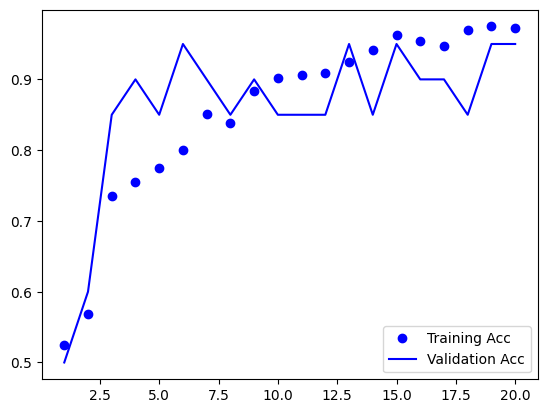

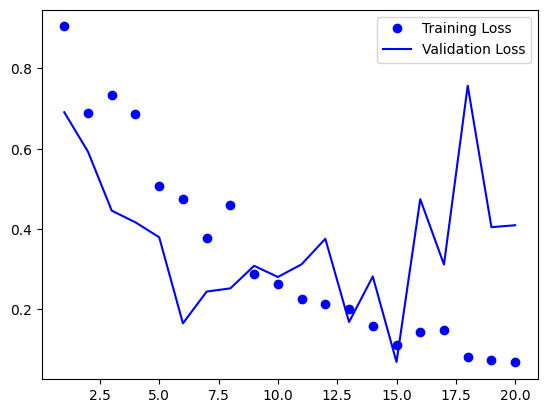

<Figure size 640x480 with 0 Axes>

In [12]:
# plotting the graph
hi = history_dic.history
acc = hi['acc']
val_acc = hi['val_acc']
loss = hi['loss']
val_loss = hi['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc,'b',label = 'Validation Acc')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.legend()
plt.figure()


now saving the first model

In [13]:
first_model.save("Simple-Model.h5")

<h3> Now fine tunning the model using VGG16 for Fine Tunning</h3>
means i am going to use the vgg16's conv base but the dense layer would be mine by unfreezing a few of the top layer. Bu this we can jointly train the model on pre-trained weights but also on our data too

In [49]:
conv_base  = VGG16(weights='imagenet',
                   include_top = False,
                   input_shape = (150,150,3))


In [50]:
print("This is the Summary of the conv base it self")
conv_base.summary()

This is the Summary of the conv base it self
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (Ma

 Above is the raw conv - base of vgg16

<h4>Now we are going to fine tune it 

In [51]:
# un - freezing the block5_conv1 for fine tunning 
conv_base.trainable = True

for layer in conv_base.layers:
    if (layer.name == 'block5_conv1'):
        layer.trainable = True
    else:
        layer.trainable = False

In [52]:
# model 2
second_model = Sequential()
second_model.add(conv_base)
second_model.add(Flatten())
second_model.add(Dense(512,activation = 'relu'))
second_model.add(Dropout(0.3))
second_model.add(Dense(256,activation = 'relu'))
second_model.add(Dropout(0.3))
second_model.add(Dense(1,activation = 'sigmoid'))

In [53]:
print('summary of the model after the trainable True of 5th block')
second_model.summary()

summary of the model after the trainable True of 5th block
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                             

In [54]:
# now training the model with fine tunning
second_model.compile(loss = 'binary_crossentropy',
                     optimizer =optimizers.RMSprop(learning_rate=1e-5),
                     metrics = ['acc'])

In [25]:
history2 = second_model.fit(train_generator,
                 steps_per_epoch=10,
                 epochs=10,
                 validation_data = val_genrator,
                 validation_steps=10)

NameError: name 'second_model' is not defined

<Figure size 640x480 with 0 Axes>

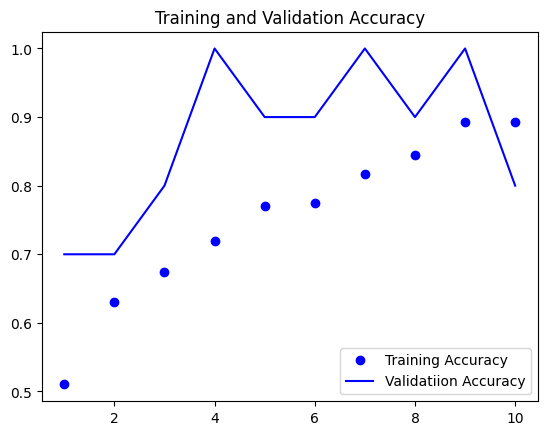

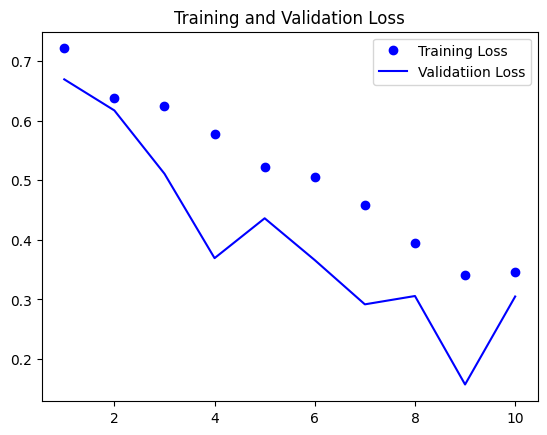

<Figure size 640x480 with 0 Axes>

In [56]:
# graph
epochs = range(1,len(history2.history['acc'])+1)
plt.plot(epochs , history2.history['acc'],'bo',label = 'Training Accuracy')
plt.plot(epochs , history2.history['val_acc'],'b',label = 'Validatiion Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , history2.history['loss'],'bo',label = 'Training Loss')
plt.plot(epochs , history2.history['val_loss'],'b',label = 'Validatiion Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()


<h3>Saving the Model


In [57]:
#saving the 2nd model
second_model.save("Second_model.h5")

<h4>Testing Both Model 

In [5]:
# making an test generator
test_dir = 'Test'
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150,150),
                batch_size = 2,
                class_mode = 'binary'    
)

Found 54 images belonging to 2 classes.


<h5>Testing the 1st Model

In [23]:
#making an cunfusion matrix
from sklearn.metrics import confusion_matrix
m1 = load_model("Second_model.h5")
# Get true labels from the test data generator
test_labels = test_generator.classes  # 0 for negative, 1 for positive

# Use your trained model to predict labels for test data generator
predicted_labels = m1.predict(test_generator)
predicted_labels = np.round(predicted_labels)  # Assuming your model outputs probabilities

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

27/27 [==============================] - 1s 9ms/step
Confusion Matrix:
[[21  9]
 [14 10]]


In [30]:
conf_di

,Negative,Positive
Negative,21,9
Positive,14,10


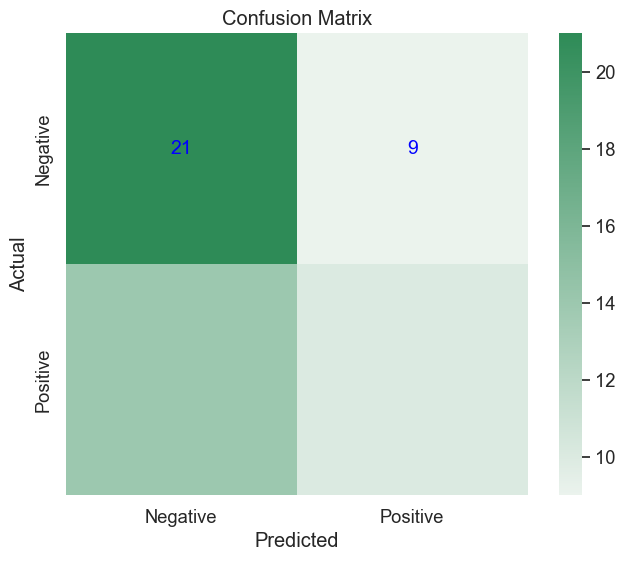

In [34]:
classes = ['Negative','Positive']
conf_di = pd.DataFrame(conf_matrix,index = classes,columns = classes)
plt.figure(figsize=(8,6))
camp = sns.light_palette("seagreen",as_cmap=True)
sns.heatmap(conf_di,annot= True,fmt='d',cmap=camp,cbar = True,square=True
            ,xticklabels=classes , yticklabels=classes, annot_kws={'size':14,'color':'blue'})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

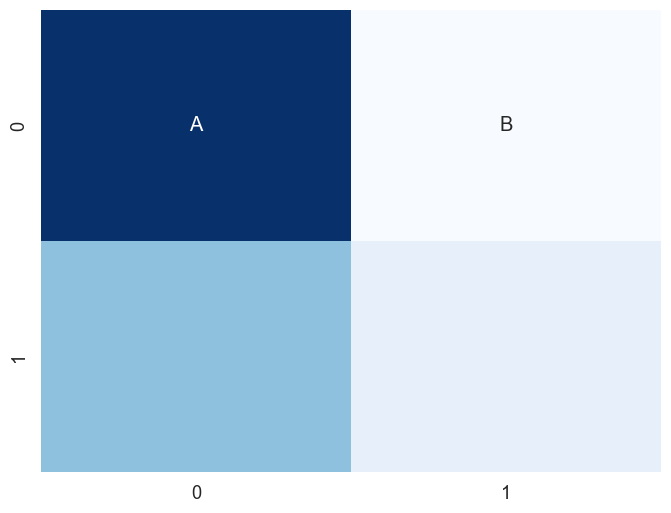

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample confusion matrix
conf_matrix = [[21, 9], [14, 10]]

# Custom annotations for specific cells
custom_annotations = [['A', 'B'], ['C', 'D']]

# Create a heatmap using seaborn with custom annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=custom_annotations, fmt="", cmap='Blues', cbar=False,)
plt.show()


In [59]:
# testing the model on first model
test_loss1 , test_acc1 = first_model.evaluate(test_generator,steps=20)
print(test_acc1,test_loss1)

20/20 [==============================] - 0s 21ms/step - loss: 0.2170 - acc: 0.9000
0.8999999761581421 0.2169923484325409


<h5>Testing on the 2nd Model

In [16]:
test_loss , test_acc = second_model.evaluate(test_generator,steps = 20)
print(test_acc,test_loss)

NameError: name 'second_model' is not defined

<h4>Results from above</h4> 
from the above code we can see that 2nd model which is trained using vgg16 is more accurate 

<h4>Custome Image Function 

In [157]:
####         test functions ##########
#def test2(image_data):
   # If image_data is a numpy array, convert it to PIL Image
#   img = image.array_to_img(image_data, data_format='channels_last')
#   img = img.resize((150, 150))  # Resize the image if needed
#   
#   img_arr = image.img_to_array(img)
#   img_arr = img_arr * 1./255
#   img_arr = np.expand_dims(img_arr, axis=0)
#   return img_arr


#def testpredict(image_path):
#    model = load_model("Second_model.h5")
#    image_preprocess = test(image_path)
#    result = model.predict(image_preprocess)
#    if ( result <= 0.5 ):
#        return ('Negative',round(result[0][0]*100,2),'%', result)
#    else:
#        return ('Positive',  round(result[0][0]*100,2),'%',result)
    
#testpredict('./Test/positive/NORMAL2-IM-0338-0001.jpeg')

<h4>Function for image preprocessing 

In [160]:
# this is the custome function to return pre-process the image to size (150 150 3)
 
def custom_Image_preprocessing(image_data, target_size=(150, 150)):
    img = image.array_to_img(image_data, data_format='channels_last')
    img = img.resize(target_size)  # Resize the image if needed
    img_arr = image.img_to_array(img)
    img_arr = img_arr * 1./255
    img_arr = np.expand_dims(img_arr, axis=0)
    return img_arr


<h>Function to predict the custome image

In [158]:
# function to predict the custome image

def image_predict(image_path):
    model = load_model("Second_model.h5")
    image_preprocess = custom_Image_preprocessing(image_path)
    result = model.predict(image_preprocess)
    if ( result <= 0.5 ):
        return 'Negative',round(result[0][0]*100,2),'%'
    else:
        return 'Positive',  round(result[0][0]*100,2),'%'

<h2> making the gradio app

In [159]:
# Define Gradio interface
input_component =  gr.components.Image(label = "Upload the X-Ray")
output_component = gr.components.Textbox(label = "Prediction")
interface = gr.Interface(fn=image_predict, inputs=input_component, outputs=output_component,title = "Lung Cancer x-Ray Classification",description="This web app provides predictions based on X-Ray images and predict either the X-ray contains sympotms of lung cancer or not ")
interface.launch()


Running on local URL:  http://127.0.0.1:7886

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 83ms/step


<h3>One Step Head</h3>
Trying to fine tune on VGG19


In [7]:
from keras.applications import VGG19

In [8]:
conv_base2  = VGG19(weights='imagenet',
                   include_top = False,
                   input_shape = (150,150,3))


In [9]:
conv_base2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
# un - freezing the block5_conv1 for fine tunning 
conv_base2.trainable = True

for layer in conv_base2.layers:
    if (layer.name == 'block5_conv1'):
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
# maing a new model for vgg19
# model 3
vgg19_model = Sequential()
vgg19_model.add(conv_base2)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512,activation = 'relu'))
vgg19_model.add(Dropout(0.3))
vgg19_model.add(Dense(256,activation = 'relu'))
vgg19_model.add(Dropout(0.3))
vgg19_model.add(Dense(1,activation = 'sigmoid'))

In [15]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

<h3>Tensorboard

In [17]:
from tensorflow.keras.callbacks import TensorBoard

In [18]:
tensorboard = TensorBoard(log_dir="logs\\{}".format('TensorBoard2'))

In [20]:
# now training the model with fine tunning
vgg19_model.compile(loss = 'binary_crossentropy',
                     optimizer =optimizers.RMSprop(learning_rate=1e-5),
                     metrics = ['acc'])

In [21]:
history3 = vgg19_model.fit(train_generator,
                 steps_per_epoch=10,
                 epochs=10,
                 validation_data = val_genrator,
                 validation_steps=10,
                 callbacks = [tensorboard])

Epoch 1/10
10/10 [==============================] - 13s 509ms/step - loss: 0.7463 - acc: 0.5153 - val_loss: 0.6073 - val_acc: 0.6000
Epoch 2/10
10/10 [==============================] - 2s 215ms/step - loss: 0.6571 - acc: 0.5800 - val_loss: 0.4876 - val_acc: 0.8000
Epoch 3/10
10/10 [==============================] - 2s 161ms/step - loss: 0.5533 - acc: 0.7100 - val_loss: 0.4980 - val_acc: 0.7000
Epoch 4/10
10/10 [==============================] - 2s 152ms/step - loss: 0.5426 - acc: 0.7449 - val_loss: 0.4520 - val_acc: 0.8000
Epoch 5/10
10/10 [==============================] - 1s 138ms/step - loss: 0.4406 - acc: 0.8214 - val_loss: 0.2133 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 1s 143ms/step - loss: 0.4094 - acc: 0.8550 - val_loss: 0.2415 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 131ms/step - loss: 0.3865 - acc: 0.8571 - val_loss: 0.2324 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 1s 136ms/step - loss: 0

<Figure size 640x480 with 0 Axes>

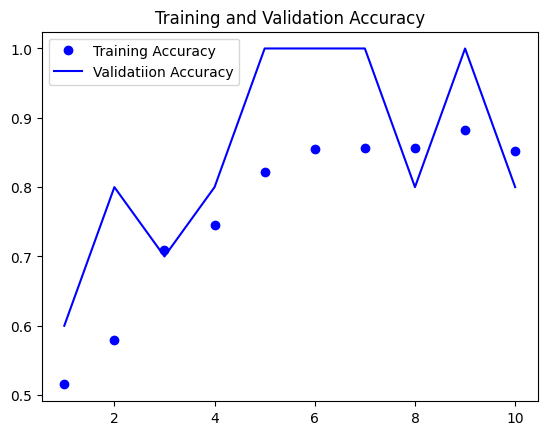

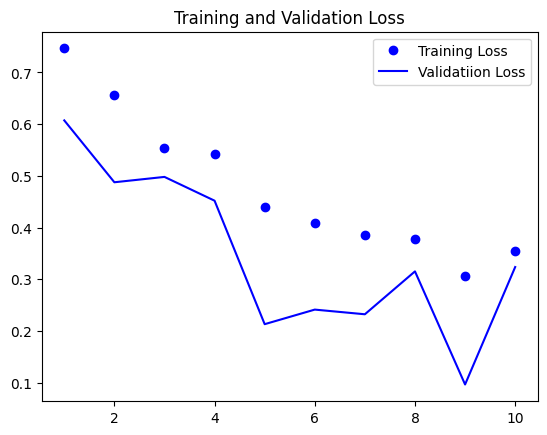

<Figure size 640x480 with 0 Axes>

In [22]:
# graph
epochs = range(1,len(history3.history['acc'])+1)
plt.plot(epochs , history3.history['acc'],'bo',label = 'Training Accuracy')
plt.plot(epochs , history3.history['val_acc'],'b',label = 'Validatiion Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , history3.history['loss'],'bo',label = 'Training Loss')
plt.plot(epochs , history3.history['val_loss'],'b',label = 'Validatiion Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()


In [224]:
test_loss1 , test_acc1= vgg19_model.evaluate(test_generator,steps=20)
print(test_acc1,test_loss1)

20/20 [==============================] - 1s 27ms/step - loss: 0.1952 - acc: 0.9000
0.8999999761581421 0.19516116380691528
